In [2]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np

# PREGUNTA 01

El número áureo $\phi$ satisface la ecuación 
$$ \phi = 1+ \frac{1}{\phi}. $$
de donde se puede obtener de manera relativamente sencilla que
$$ \phi = \frac{1+\sqrt{5}}{2} $$

## a) Calcule directamente en Python el valor de $\phi$.

### Respuesta:

In [3]:
phi= (1+np.sqrt(5))/2
phi

1.618033988749895

## b) Defina una función adecuada para utilizar el método de Newton-Rhapson y aproxime el valor de $\phi$, justificando la elección valor inicial elegido, con una tolerancia de $10^{-9}$.
    
   ### Respuesta:
A partir de la ecuación
$$ \phi = 1+ \frac{1}{\phi} $$

se sigue que
$$ \phi ^2 = \phi +1, $$

luego basta con definir la función 
$$ f(\phi) = \phi^2-\phi-1 $$

cuya raíz positiva, corresponde a una aproximación de $\phi$.

Con el resultado obtenido en $a)$ se intuye que un buen punto de partida es el valor $1$. Verificamos que es un buen valor, pues la derivada de la función elegida no se hace cero.

$$ f'(1)= 1 $$

por tanto se satisface la condición y es posible aplicar el método de Newton-Rhapson utilizando el código acontinuación:

In [4]:
def metodo_Newton_Rhapson(x0,f,df,t): 
    while True:
        x1 = x0 - (f(x0)/df(x0))
        if np.abs(x0-x1)<t:
            break
        x0 = x1
    return x1

In [5]:
def f(phi): return phi**2-phi-1 
def df(phi):return 2*phi-1 
metodo_Newton_Rhapson(1,f,df,1e-9)

1.618033988749895

Por tanto, una aproximación de $\phi$ vía Método de Newton-Rhapson con una tolerancia de $10^{-9}$ es

$$ \phi \approx 1.618033988749895 $$

## e) Suponga que el valor máquina encontrado en (a) es el valor real de $\phi$. Calcule el error cometido con cada uno de los métodos y concluya cuál de ellos entrega una mejor aproximación.

### Respuesta:

Para concluir cuál de los métodos en mas certero, basta con calcular 

$$ E = \vert \phi - x_n \vert, $$

donde $\phi$ es el valor obtenido en a. y $x_n$ la aproximación obtenida con cada método.

In [6]:
Error_Newton_Rhapson = np.abs(phi - metodo_Newton_Rhapson(1,f,df,1e-9))
Error_Newton_Rhapson

0.0

A simple vista notamos que las aproximaciones entregadas por ambos métodos son exactamente las mismas que el valor entregado por Python. Con esto concluimos que, para esta aproximación, ambos métodos son igual de buenos.

# PREGUNTA 02

Considere el la función por partes definida por
$$f(t)= \left\{ \begin{array}{lcc}
             0 &   si  & t < 1 \\
             \\ 1 &  si & 1 \leq t < 2 \\
             \\ 2 &  si & 2 \leq t < 3\\
             \\ 3 &  si  & t \geq 3
             \end{array}
   \right. .$$

## a) Reescriba  la función en términos de la función de Heaviside, utilizando la notación de Jupyter para esta función:
    
   ### Respuesta: 
   Primero definimos las variables:

In [9]:
t,s =sp.symbols('t,s')

Luego escribimos la función $f$ en términos de Heaviside y graficamos para comprobar:

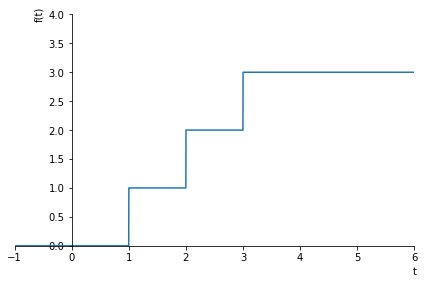

In [19]:
#f=sp.Heaviside(t-1)-sp.Heaviside(t-2)+sp.Heaviside(t-2)*2-sp.Heaviside(t-3)*2+sp.Heaviside(t-3)*3
f = sp.Heaviside(t-1) + sp.Heaviside(t-2) + sp.Heaviside(t-3)
sp.plot(f, xlim=(-1, 6), ylim=(0, 4))

In [20]:
f

Heaviside(t - 3) + Heaviside(t - 2) + Heaviside(t - 1)

## b) Utilizando transformada de Laplace y con ayuda de los comandos de Python, resuelva la ecuación
## $$ y''+2y'+y-1=f(t)$$

## con condiciones $y(0)=0$, $y'(0)=1$, donde $f$ es la función por partes definida en el apartado anterior.
    
   ### Respuesta: 
   Aplicamos transformada de Laplace a la ecuación y obtenemos:
   $$\mathcal{L}\left\lbrace y''\right\rbrace+2 \mathcal{L}\left\lbrace y'\right\rbrace+\mathcal{L}\left\lbrace y\right\rbrace-\mathcal{L}\left\lbrace 1\right\rbrace= \mathcal{L}\left\lbrace f(t) \right\rbrace$$
   que corresponde a:
   $$s^2\mathcal{L}\left\lbrace y(t)\right\rbrace-sy(0)-y'(0)+2\left[s\mathcal{L}\left\lbrace y(t)\right\rbrace-y(0)\right]+\mathcal{L}\left\lbrace y\right\rbrace-\dfrac{1}{s}= \mathcal{L}\left\lbrace f(t) \right\rbrace.$$
   despejamos $\mathcal{L}\left\lbrace y(t)\right\rbrace$ y tenemos:
   $$\mathcal{L}\left\lbrace y(t)\right\rbrace = \dfrac{\mathcal{L}\left\lbrace f(t) \right\rbrace}{\left( s^2+2s+1\right)}+\dfrac{1}{s\left( s^2+2s+1\right)}+\dfrac{1}{\left( s^2+2s+1\right)}.$$
   Ahora calculamos $\mathcal{L}\left\lbrace f(t) \right\rbrace$

In [22]:
F=sp.laplace_transform(f,t,s,noconds=True)
F

(exp(2*s) + exp(s) + 1)*exp(-3*s)/s

Luego tendremos:

In [36]:
Y=F/(s**2+2*s+1)+1/(s*(s**2+2*s+1))+1/(s**2+2*s+1)
Y

1/(s**2 + 2*s + 1) + (exp(2*s) + exp(s) + 1)*exp(-3*s)/(s*(s**2 + 2*s + 1)) + 1/(s*(s**2 + 2*s + 1))

y calculamos su transformada inversa:

In [34]:
y=sp.inverse_laplace_transform(Y,s,t,noconds=True)
y

(t*Heaviside(t) - (t - exp(t) + 1)*Heaviside(t) + (-(t*exp(1 - t) - 1)*Heaviside(t - 1) + (-t*exp(2 - t) + exp(2 - t) + 1)*Heaviside(t - 2) + (-t*exp(3 - t) + 2*exp(3 - t) + 1)*Heaviside(t - 3))*exp(t))*exp(-t)

## c) Grafique la solución de la ecuación diferencial y estudie el comportamiento de la solución $y$ conforme $t\to\infty$:
    
   ### Respuesta: 
   Graficamos:

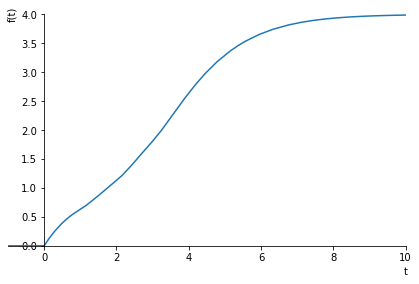

In [35]:
sp.plot(y, xlim=(-1, 10), ylim=(0, 4))